In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline


In [2]:
! ls dataset_fe

Foreign_Exchange_Rates.csv  Foreign_Exchange_Rates.xlsx


In [3]:
file_names = ["INFY.NS.csv","LTI.NS.csv","MINDTREE.NS.csv","TATAELXSI.NS.csv","TCS.BO.csv","TECHM.NS.csv","WIPRO.NS.csv"]
df = None
for file in file_names:
    df_tmp = pd.read_csv('dataset_stock/'+file)
    df_tmp["Stock"] = file.replace('.csv','')
    
    if type(df)!=pd.core.frame.DataFrame:
        df = df_tmp
    else:
        df =df.append(df_tmp)
df = df.reset_index().iloc[:,1:]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2019-06-24,751.900024,751.900024,742.650024,745.500000,718.777893,4758178.0,INFY.NS
1,2019-06-25,744.000000,750.900024,737.299988,748.099976,721.284668,3677911.0,INFY.NS
2,2019-06-26,743.000000,751.450012,738.000000,739.200012,712.703735,5447130.0,INFY.NS
3,2019-06-27,742.000000,744.700012,728.150024,730.549988,704.363770,11122346.0,INFY.NS
4,2019-06-28,735.500000,739.500000,728.500000,732.000000,705.761780,5919494.0,INFY.NS


In [4]:
df.shape,df.shape[0]/len(df.Stock.unique())

((1722, 8), 246.0)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1.715000e+03
mean,999.311545,1015.047319,983.655685,998.960116,989.561312,2.875482e+06
std,604.832664,612.000627,597.007069,604.255812,596.315012,4.817455e+06
min,163.100006,171.350006,159.399994,162.350006,162.350006,0.000000e+00
25%,669.274994,679.625000,658.200012,668.099976,655.812378,2.140815e+05
50%,778.799988,787.799988,767.599976,777.299988,765.009155,1.044341e+06
75%,1545.000000,1589.250000,1505.000000,1542.450012,1540.685242,3.825161e+06
max,2277.000000,2296.000000,2251.100098,2275.100098,2242.000732,9.015253e+07


In [6]:
df=df.dropna() 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 0 to 1721
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1715 non-null   object 
 1   Open       1715 non-null   float64
 2   High       1715 non-null   float64
 3   Low        1715 non-null   float64
 4   Close      1715 non-null   float64
 5   Adj Close  1715 non-null   float64
 6   Volume     1715 non-null   float64
 7   Stock      1715 non-null   object 
dtypes: float64(6), object(2)
memory usage: 120.6+ KB


In [8]:
stocks = [file.replace('.csv','') for file in file_names]
stocks

['INFY.NS',
 'LTI.NS',
 'MINDTREE.NS',
 'TATAELXSI.NS',
 'TCS.BO',
 'TECHM.NS',
 'WIPRO.NS']

# 1. Change in price during daily close

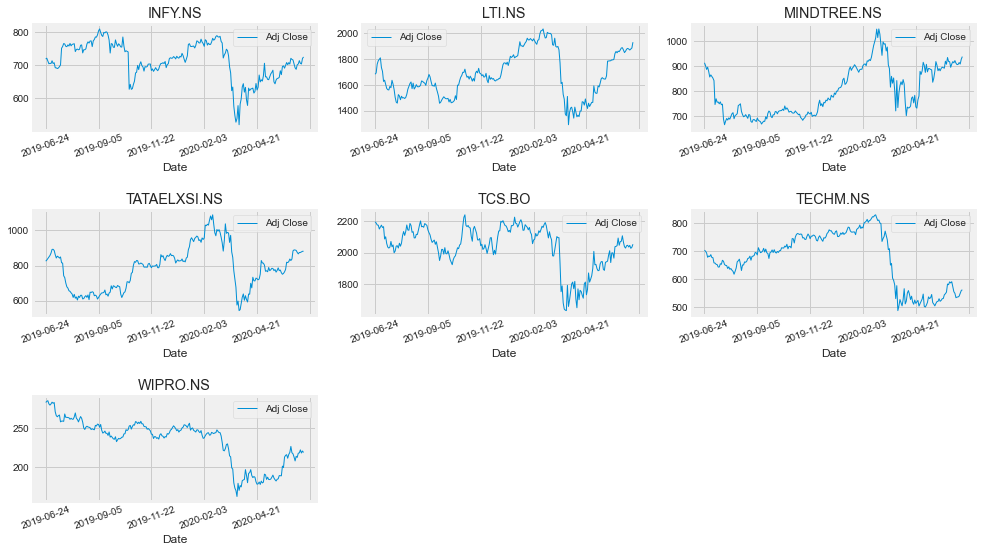

In [9]:
# Varience of stock price daily
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
for i, s in enumerate(stocks,1):
    ax = plt.subplot(4,3,i)
    df[df["Stock"]==s].plot(kind='line',ax=ax,lw=1,x='Date',y="Adj Close")
    plt.title(s)
    plt.xticks(rotation=20)
plt.tight_layout(pad=2.0)

Above graph descibes how varing is the our data everyday, but we can observe there is common up/down in graph at particular point

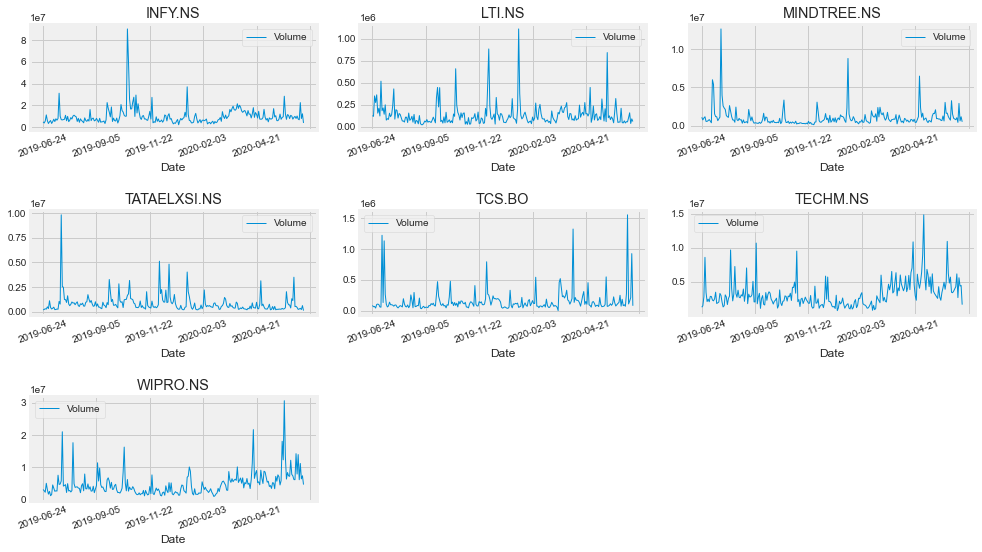

In [10]:
# Volume of stock price traded daily basis
plt.figure(figsize=(14, 10))
for i, s in enumerate(stocks,1):
    ax = plt.subplot(4,3,i)
    df[df["Stock"]==s].plot(kind='line',lw=1,x="Date",y="Volume",ax=ax)
    plt.title(s)
    plt.xticks(rotation=20)
plt.tight_layout(pad=2.0)

Each stock is varying differently, but if excluded the max values and observed the low /mid values it can be observed that the all stock are varying by same values. So assuming Standard Deviation on all the data could get the data to perticular level<br/>
So with the observation of above graph plotting moving average would help in analysing how varing the data is

# 2.Moving average of various stocks

In [11]:
ma_day = [5,10, 20, 50] # days of moving average
for ma in ma_day:
    tmp = []
    column_name = f"MA for {ma} days"
    for stock in stocks:
        tmp.append(df[df['Stock']==stock]['Adj Close'].rolling(ma).mean())
    tmp = np.array(tmp)
    df[column_name] = tmp.reshape(tmp.shape[1]*tmp.shape[0])
    
df.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days
0,2019-06-24,751.900024,751.900024,742.650024,745.500000,718.777893,4758178.0,INFY.NS,NaN,NaN,NaN,NaN
1,2019-06-25,744.000000,750.900024,737.299988,748.099976,721.284668,3677911.0,INFY.NS,NaN,NaN,NaN,NaN
2,2019-06-26,743.000000,751.450012,738.000000,739.200012,712.703735,5447130.0,INFY.NS,NaN,NaN,NaN,NaN
3,2019-06-27,742.000000,744.700012,728.150024,730.549988,704.363770,11122346.0,INFY.NS,NaN,NaN,NaN,NaN
4,2019-06-28,735.500000,739.500000,728.500000,732.000000,705.761780,5919494.0,INFY.NS,712.578369,NaN,NaN,NaN
5,2019-07-01,735.000000,737.500000,729.849976,731.299988,705.086792,3224968.0,INFY.NS,709.840149,NaN,NaN,NaN
6,2019-07-02,734.000000,741.650024,730.099976,740.000000,713.474976,4837606.0,INFY.NS,708.278211,NaN,NaN,NaN
7,2019-07-03,741.000000,743.200012,730.000000,731.299988,705.086792,5958379.0,INFY.NS,706.754822,NaN,NaN,NaN
8,2019-07-04,729.000000,736.400024,728.599976,733.799988,707.497192,3274064.0,INFY.NS,707.381506,NaN,NaN,NaN
9,2019-07-05,735.000000,736.400024,713.500000,718.000000,692.263611,4926289.0,INFY.NS,704.681873,708.630121,NaN,NaN


Stock
INFY.NS         [[AxesSubplot(0.08,0.725918;0.241667x0.154082)...
LTI.NS          [[AxesSubplot(0.08,0.725918;0.241667x0.154082)...
MINDTREE.NS     [[AxesSubplot(0.08,0.725918;0.241667x0.154082)...
TATAELXSI.NS    [[AxesSubplot(0.08,0.725918;0.241667x0.154082)...
TCS.BO          [[AxesSubplot(0.08,0.725918;0.241667x0.154082)...
TECHM.NS        [[AxesSubplot(0.08,0.725918;0.241667x0.154082)...
WIPRO.NS        [[AxesSubplot(0.08,0.725918;0.241667x0.154082)...
dtype: object

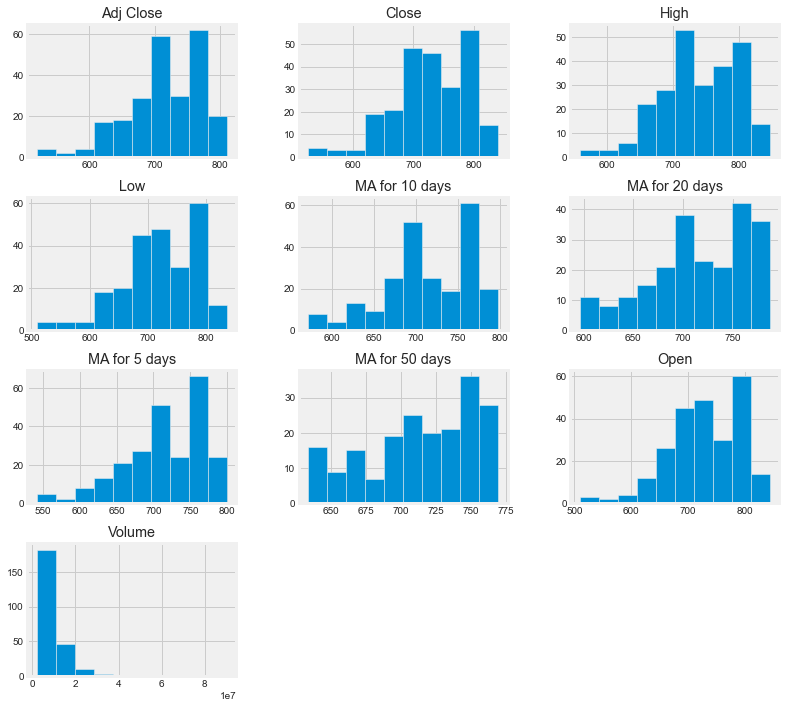

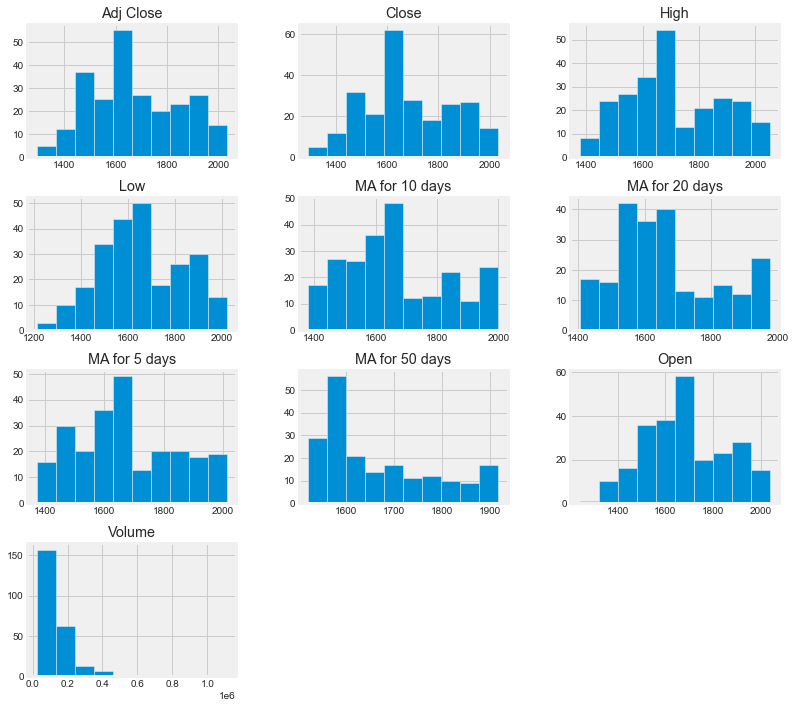

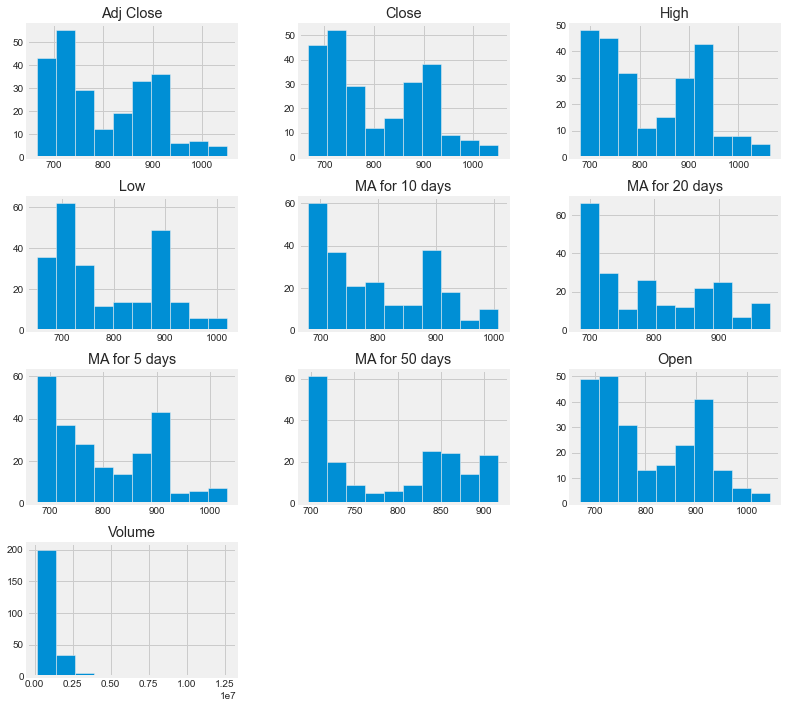

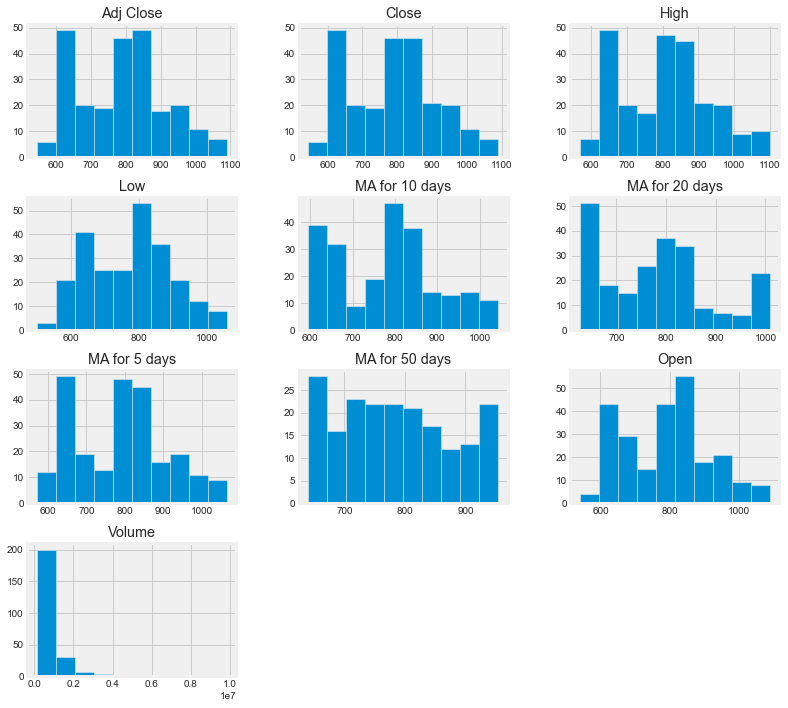

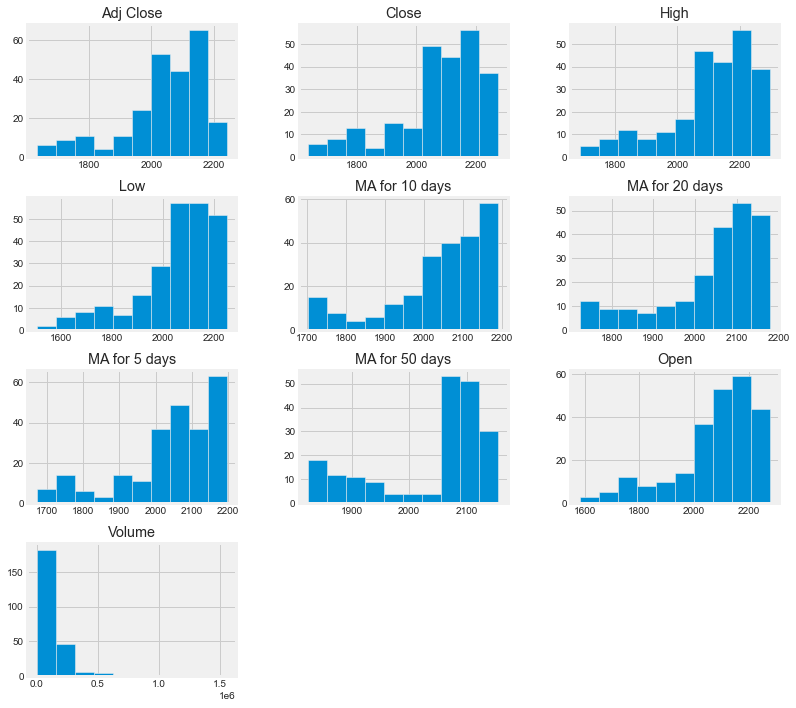

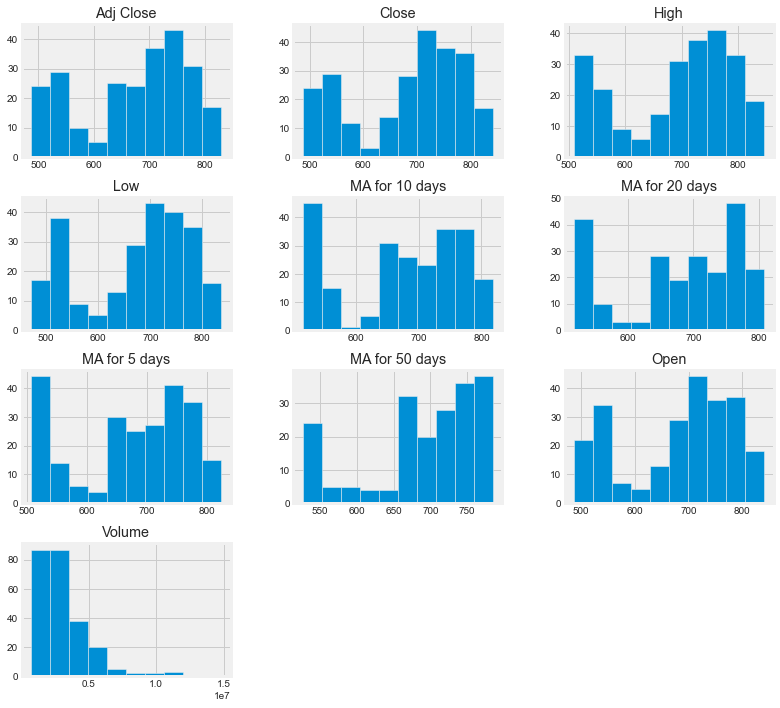

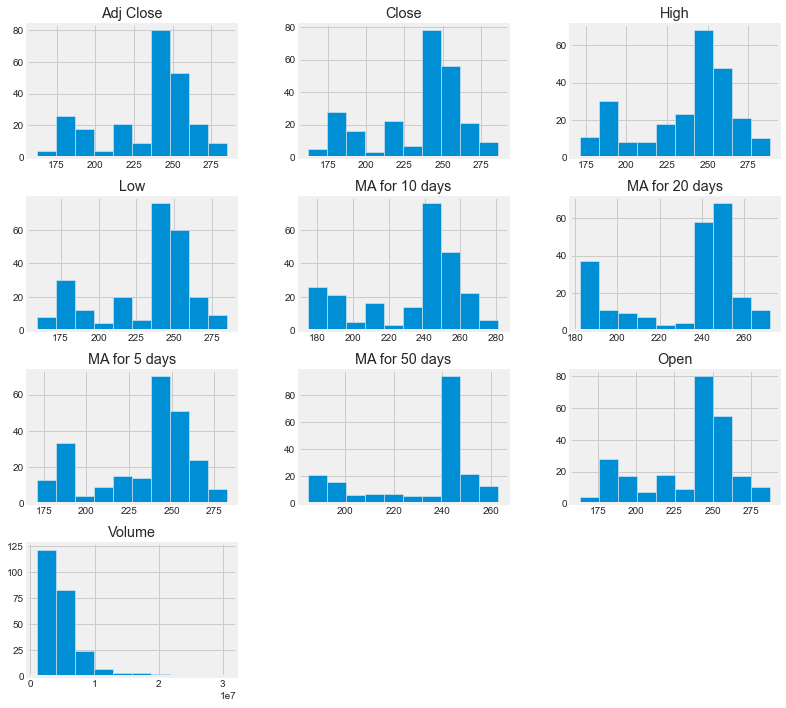

In [12]:
df.groupby("Stock").hist(figsize=(12, 12))

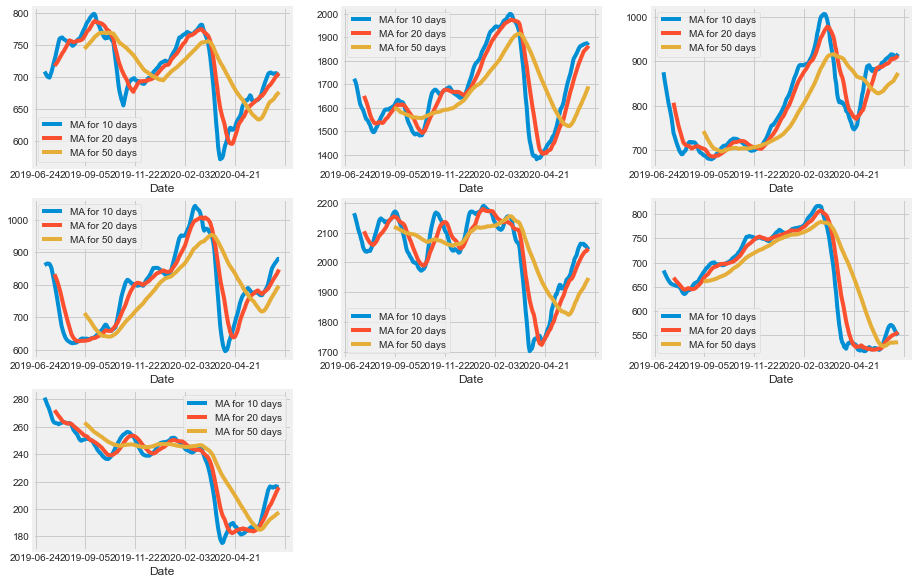

In [13]:
plt.figure(figsize=(14, 10))
for index,stock in enumerate(stocks,1):
    ax = plt.subplot(3,3,index)
    df[df["Stock"]==stock][["Date",'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(kind='line',x="Date",ax=ax)
    

In [14]:
tmp = []
for stock in stocks:
    tmp.append(df[df["Stock"]==stock]['Adj Close'].pct_change().values)
tmp = np.array(tmp)
df["Daily Return"] = tmp.reshape(tmp.shape[1]*tmp.shape[0])

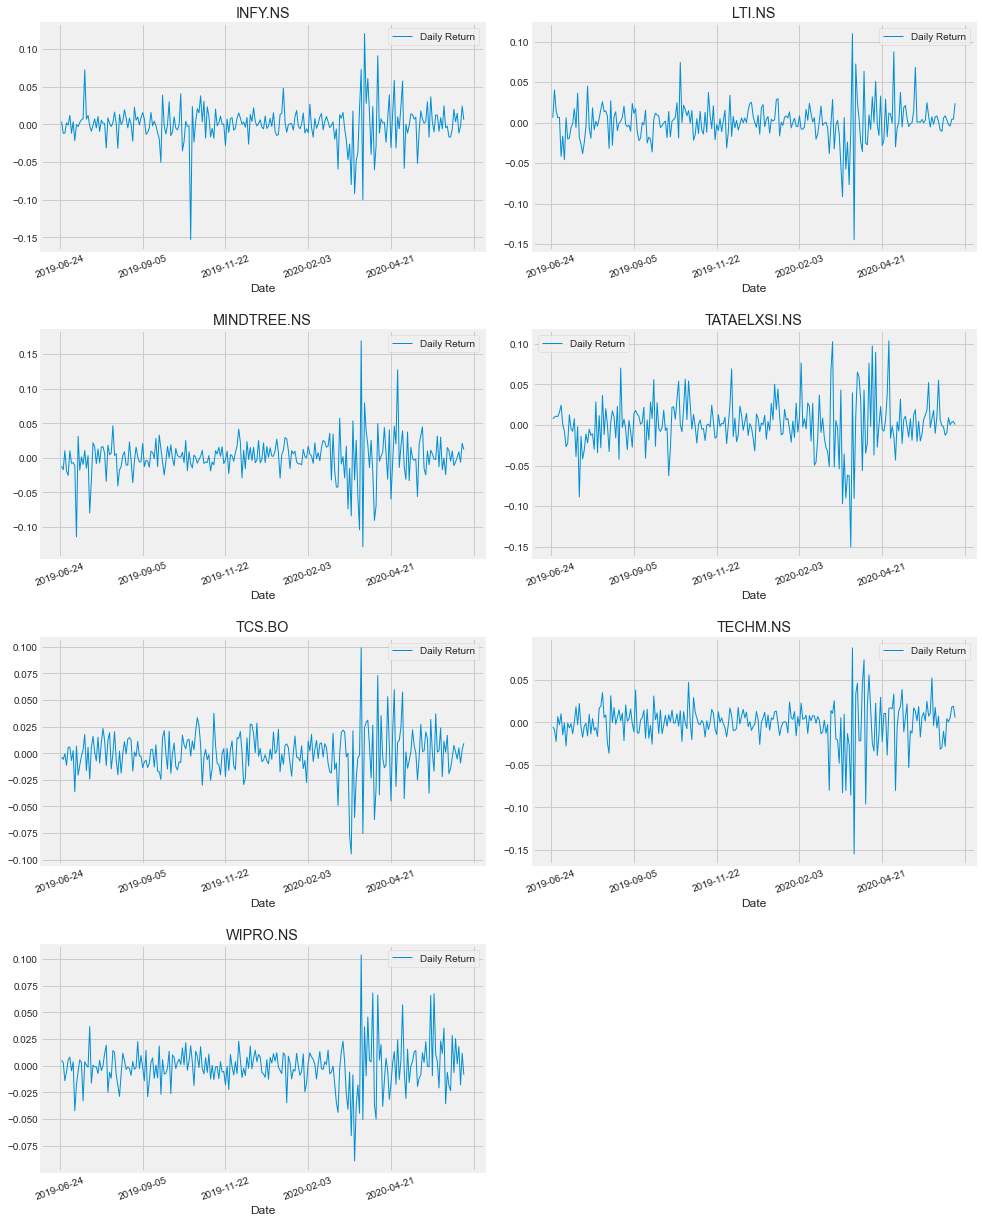

In [15]:
index=1
plt.figure(figsize=(14, 21))
for i,eachStock in df.groupby("Stock"):
    ax = plt.subplot(5,2,index)
    eachStock.plot(kind='line',ax=ax,y="Daily Return",x='Date',lw=1)
    index = index + 1
    plt.xticks(rotation=20)
    plt.title(i)
plt.tight_layout(pad=2.0)

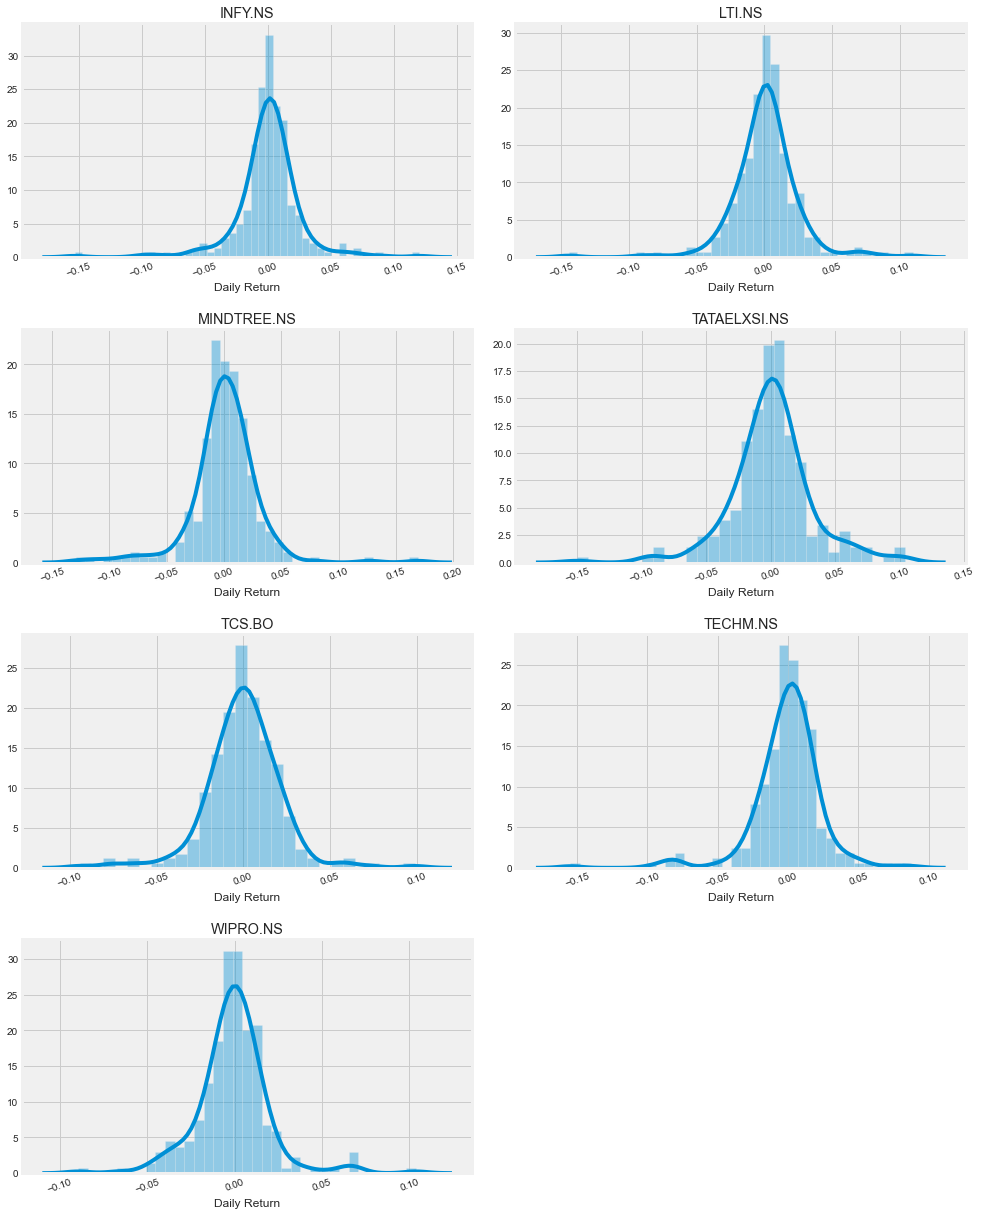

In [16]:
index=1
plt.figure(figsize=(14, 21))
for i,eachStock in df.groupby("Stock"):
    ax = plt.subplot(5,2,index)
    sns.distplot(eachStock["Daily Return"].dropna(),ax=ax)
    index = index + 1
    plt.xticks(rotation=20)
    plt.title(i)
plt.tight_layout(pad=2.0)

In [17]:
stockMap = {}
for stock in stocks:
    df[df["Stock"]==stock]["Adj Close"]
    stockMap[stock] = df[df["Stock"]==stock]["Adj Close"].values
close_df = pd.DataFrame(stockMap)
close_df.head()

,INFY.NS,LTI.NS,MINDTREE.NS,TATAELXSI.NS,TCS.BO,TECHM.NS,WIPRO.NS
0,718.777893,1682.686768,914.064880,825.467285,2197.679199,703.237122,282.758453
1,721.284668,1692.907227,903.019531,831.767822,2189.709229,699.471069,284.152802
2,712.703735,1761.109009,887.375854,839.910095,2177.103027,693.435730,284.999420
3,704.363770,1786.856567,896.430237,849.021667,2176.088623,677.840454,280.965698
4,705.761780,1797.863159,879.269592,857.745483,2151.551758,682.330750,279.372131


In [18]:
close_df.pct_change()

,INFY.NS,LTI.NS,MINDTREE.NS,TATAELXSI.NS,TCS.BO,TECHM.NS,WIPRO.NS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003488,0.006074,-0.012084,0.007633,-0.003627,-0.005355,0.004931
2,-0.011897,0.040287,-0.017324,0.009789,-0.005757,-0.008628,0.002979
3,-0.011702,0.014620,0.010204,0.010848,-0.000466,-0.022490,-0.014153
4,0.001985,0.006160,-0.019143,0.010275,-0.011276,0.006624,-0.005672
...,...,...,...,...,...,...,...
240,0.014567,-0.002444,0.000607,0.008997,-0.005347,0.000654,0.001607
241,-0.011696,-0.004234,0.008486,0.000114,0.005032,0.005505,0.017878
242,-0.002622,0.004091,-0.006611,0.003486,-0.009160,0.017909,-0.018014
243,0.024087,0.004154,0.020901,0.004214,0.003500,0.018778,0.011695


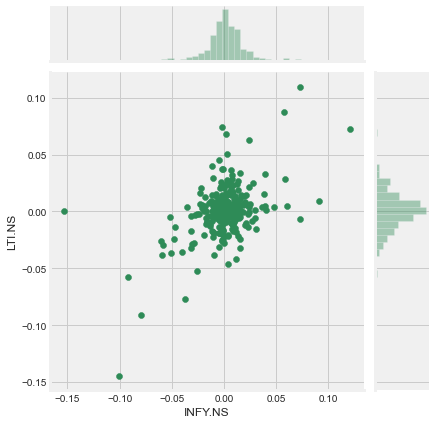

In [19]:
sns.jointplot('INFY.NS', 'LTI.NS', close_df.pct_change(), kind='scatter', color='seagreen')

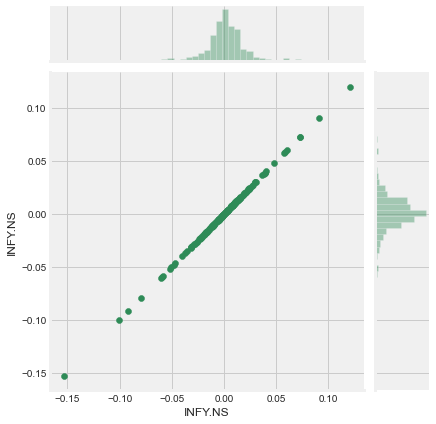

In [20]:
sns.jointplot('INFY.NS', 'INFY.NS', close_df.pct_change(), kind='scatter', color='seagreen')

In [21]:
close_df.pct_change().corr()

,INFY.NS,LTI.NS,MINDTREE.NS,TATAELXSI.NS,TCS.BO,TECHM.NS,WIPRO.NS
INFY.NS,1.000000,0.495897,0.465535,0.351108,0.635051,0.615494,0.515275
LTI.NS,0.495897,1.000000,0.477728,0.397165,0.522124,0.539391,0.439006
MINDTREE.NS,0.465535,0.477728,1.000000,0.423454,0.466366,0.549400,0.470156
TATAELXSI.NS,0.351108,0.397165,0.423454,1.000000,0.317768,0.455361,0.365107
TCS.BO,0.635051,0.522124,0.466366,0.317768,1.000000,0.551278,0.556170
TECHM.NS,0.615494,0.539391,0.549400,0.455361,0.551278,1.000000,0.532807
WIPRO.NS,0.515275,0.439006,0.470156,0.365107,0.556170,0.532807,1.000000


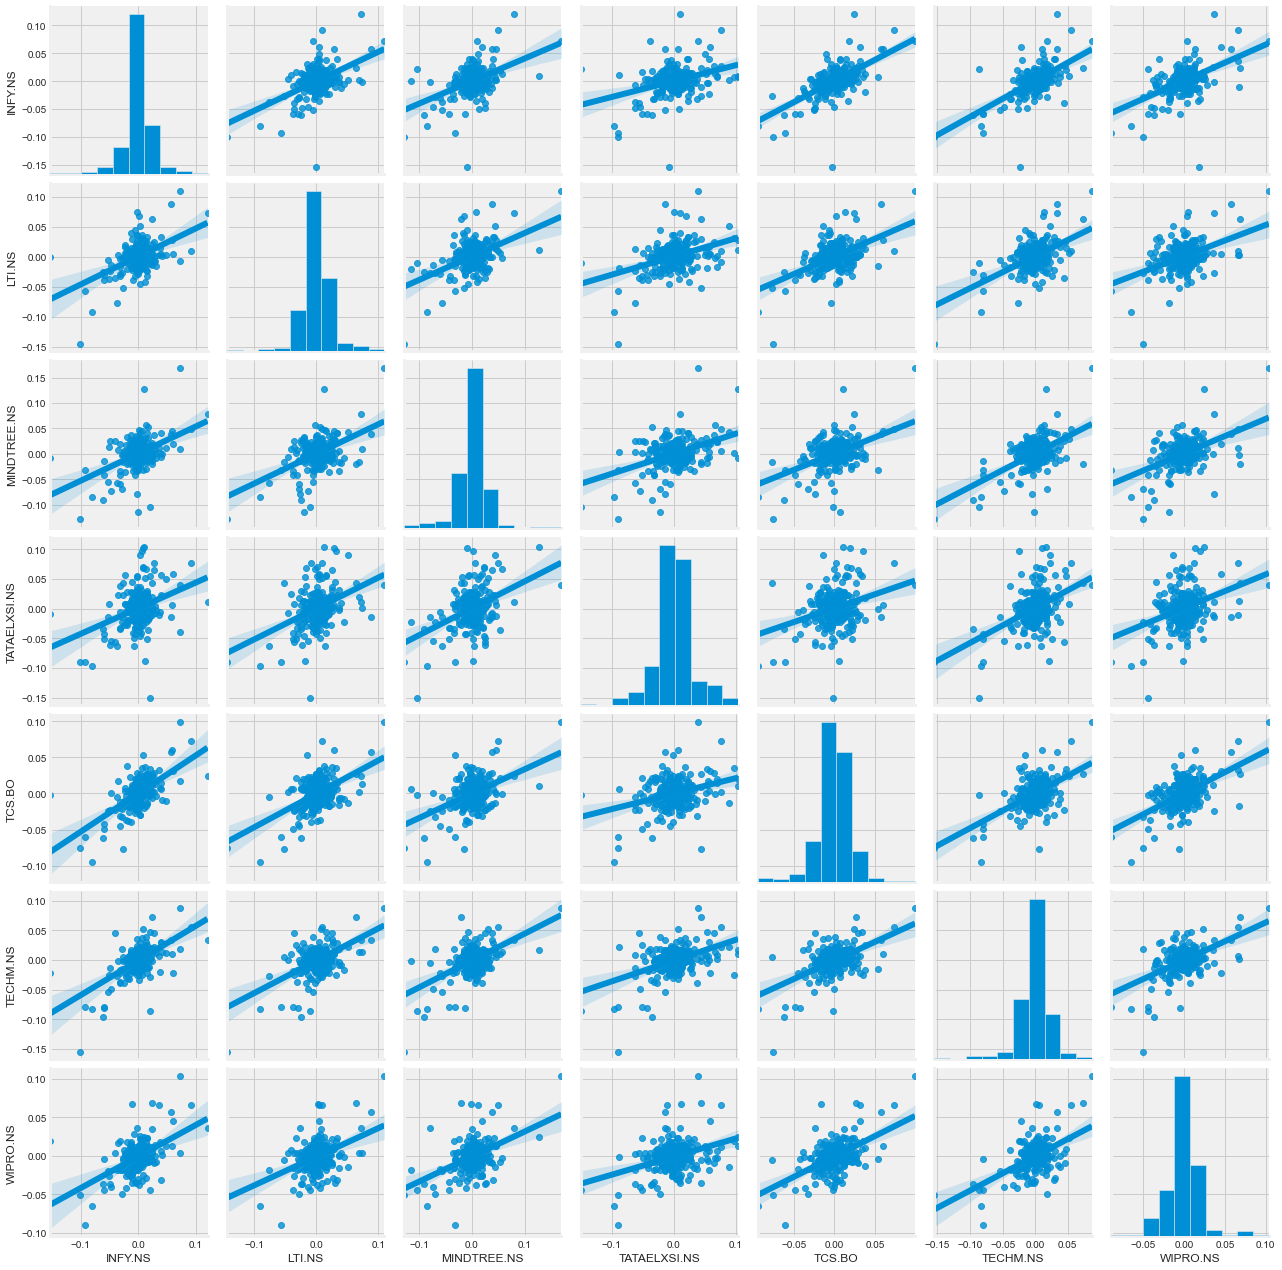

In [22]:
sns.pairplot(close_df.pct_change(), kind='reg')

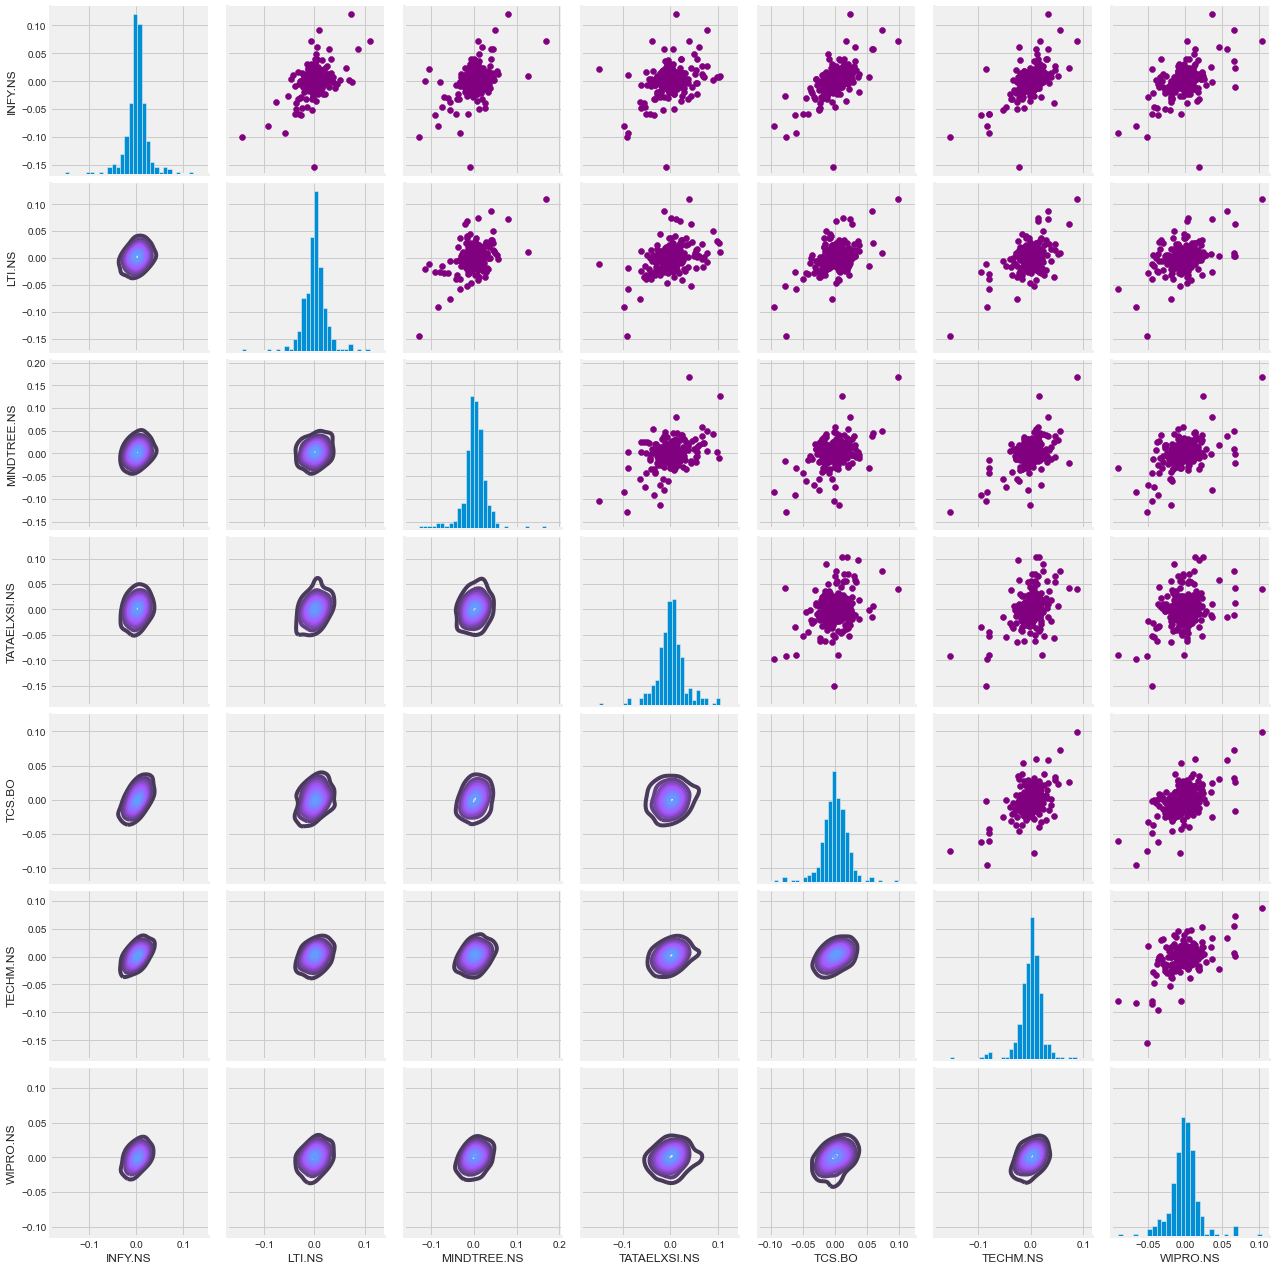

In [23]:
return_fig = sns.PairGrid(close_df.pct_change())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

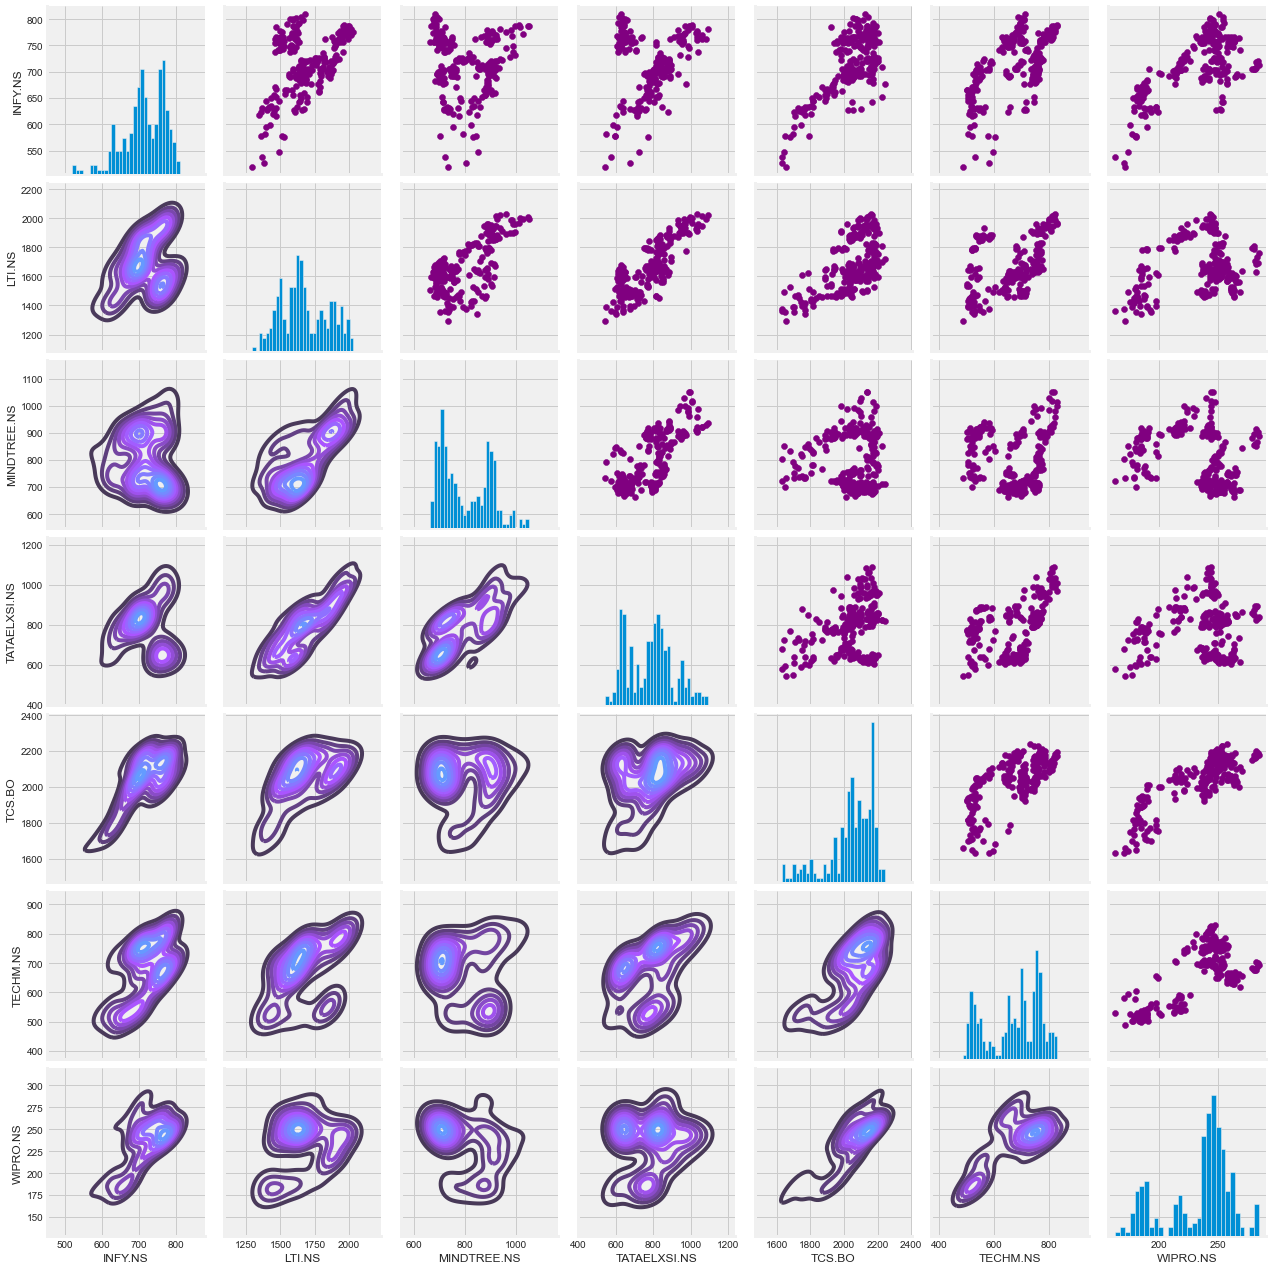

In [24]:
return_fig = sns.PairGrid(close_df)
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

In [25]:
close_df.pct_change().corr()

,INFY.NS,LTI.NS,MINDTREE.NS,TATAELXSI.NS,TCS.BO,TECHM.NS,WIPRO.NS
INFY.NS,1.000000,0.495897,0.465535,0.351108,0.635051,0.615494,0.515275
LTI.NS,0.495897,1.000000,0.477728,0.397165,0.522124,0.539391,0.439006
MINDTREE.NS,0.465535,0.477728,1.000000,0.423454,0.466366,0.549400,0.470156
TATAELXSI.NS,0.351108,0.397165,0.423454,1.000000,0.317768,0.455361,0.365107
TCS.BO,0.635051,0.522124,0.466366,0.317768,1.000000,0.551278,0.556170
TECHM.NS,0.615494,0.539391,0.549400,0.455361,0.551278,1.000000,0.532807
WIPRO.NS,0.515275,0.439006,0.470156,0.365107,0.556170,0.532807,1.000000


In [26]:
close_df.corr()

,INFY.NS,LTI.NS,MINDTREE.NS,TATAELXSI.NS,TCS.BO,TECHM.NS,WIPRO.NS
INFY.NS,1.000000,0.408667,-0.014765,0.174481,0.720083,0.584814,0.669263
LTI.NS,0.408667,1.000000,0.699945,0.837243,0.596610,0.495260,0.262152
MINDTREE.NS,-0.014765,0.699945,1.000000,0.724107,0.035966,-0.022005,-0.276054
TATAELXSI.NS,0.174481,0.837243,0.724107,1.000000,0.380937,0.477541,0.146124
TCS.BO,0.720083,0.596610,0.035966,0.380937,1.000000,0.686659,0.826775
TECHM.NS,0.584814,0.495260,-0.022005,0.477541,0.686659,1.000000,0.710701
WIPRO.NS,0.669263,0.262152,-0.276054,0.146124,0.826775,0.710701,1.000000


In [27]:
## Tech Mahindra and Wipro seem to have 71 % corelation
## Infosys and TCS seem to have 72%
## Tata Elxsi and LRI has about 84%

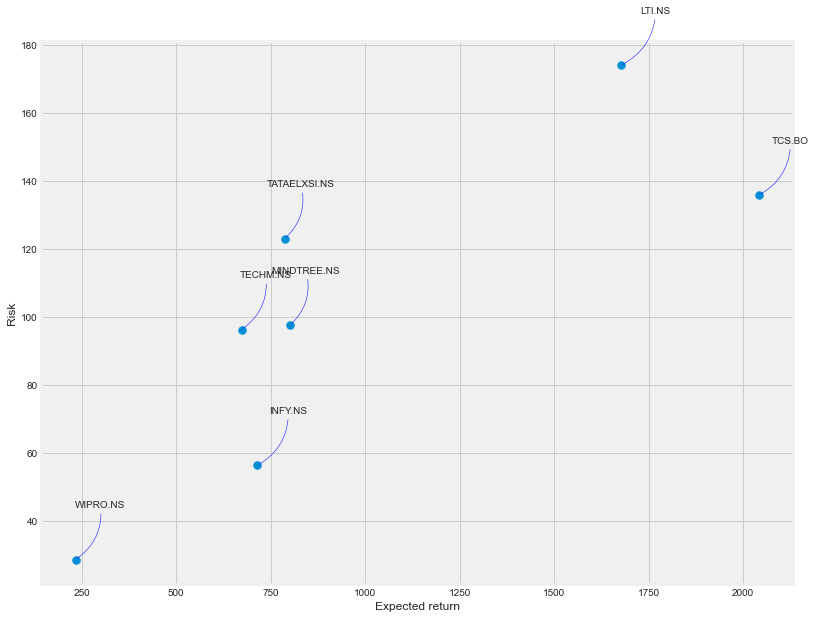

In [28]:
pctOp = close_df.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(pctOp.mean(), pctOp.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(pctOp.columns, pctOp.mean(), pctOp.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Creating model to predict the Larsen & Toubro Infotech Limited Stock
Thus have taken 5 years dataset

In [29]:
tataelxsi_df = pd.read_csv("dataset_stock/LTI.NS-5YD.csv")

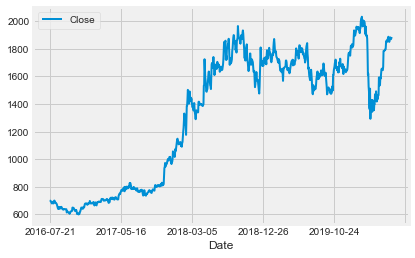

In [30]:
tataelxsi_df = tataelxsi_df.dropna()
tataelxsi_df.plot(x="Date",y="Close",lw=2)

In [31]:
data = tataelxsi_df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

771

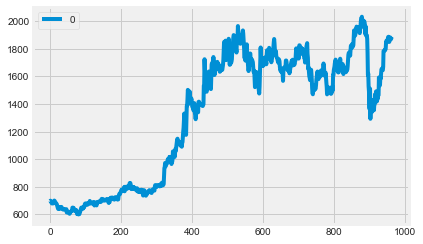

In [32]:
pd.DataFrame(dataset).plot()

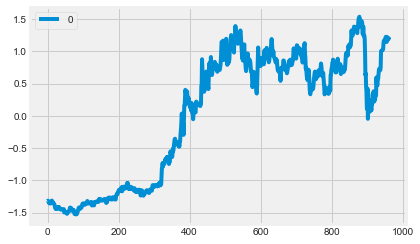

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

pd.DataFrame(scaled_data).plot()

In [34]:
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [35]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(711, 60, 1)

In [36]:
x_train.shape,y_train.shape

((711, 60, 1), (711,))

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D,Flatten

#Build the LSTM model
model = Sequential()
model.add(Conv1D(100,5,activation='relu', input_shape= (60,1)))
model.add(Conv1D(100,5,activation='relu'))

model.add(Conv1D(100,5,activation='relu'))
model.add(Conv1D(100,5,activation='relu'))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(1,name='op',activation='relu'))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train.reshape(y_train.shape[0],1),epochs=10,batch_size=50,validation_split=0.2)

Train on 568 samples, validate on 143 samples
Epoch 1/10
568/568 [==============================] - 1s 1ms/step - loss: 0.9239 - val_loss: 0.0672
Epoch 2/10
568/568 [==============================] - 0s 633us/step - loss: 0.7985 - val_loss: 0.0544
Epoch 3/10
568/568 [==============================] - 0s 716us/step - loss: 0.7866 - val_loss: 0.0311
Epoch 4/10
568/568 [==============================] - 0s 610us/step - loss: 0.7807 - val_loss: 0.0725
Epoch 5/10
568/568 [==============================] - 0s 602us/step - loss: 0.7858 - val_loss: 0.0281
Epoch 6/10
568/568 [==============================] - 0s 597us/step - loss: 0.7837 - val_loss: 0.0376
Epoch 7/10
568/568 [==============================] - 0s 604us/step - loss: 0.7824 - val_loss: 0.0263
Epoch 8/10
568/568 [==============================] - 0s 617us/step - loss: 0.7786 - val_loss: 0.0242
Epoch 9/10
568/568 [==============================] - 0s 624us/step - loss: 0.7775 - val_loss: 0.0248
Epoch 10/10
568/568 [=================

In [57]:
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
x_test = np.array(x_test)

In [58]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [59]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [60]:
np.sqrt(np.mean(((predictions - y_test) ** 2))) #RMS

130.09694546652022

/Users/narengs7/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


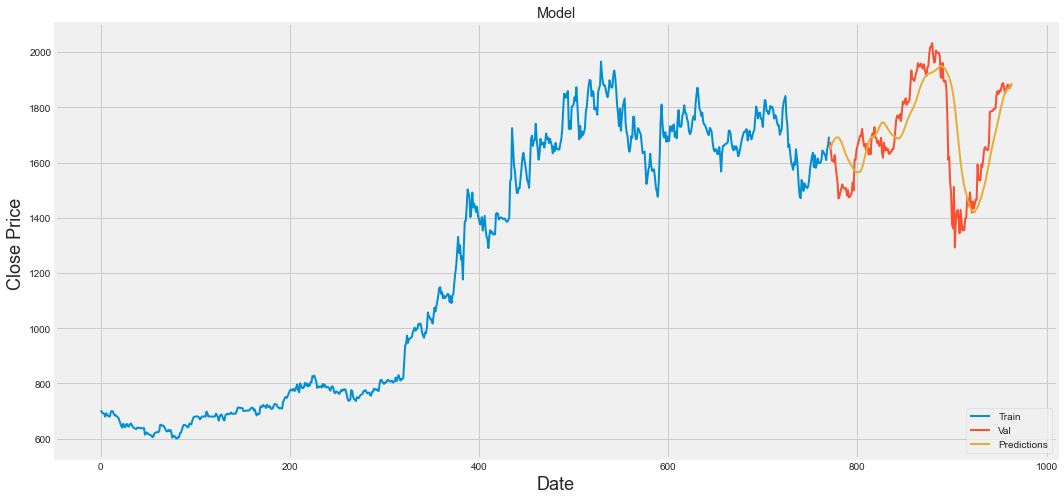

In [61]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
t_dates = tataelxsi_df["Date"].values[:training_data_len]
v_dates = tataelxsi_df["Date"].values[training_data_len:]

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'].values,lw=2)
plt.plot(valid[['Close', 'Predictions']],lw=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [62]:
real_val = pd.DataFrame(tataelxsi_df["Close"].values[-62:-2])

In [63]:
real_val =  scaler.transform(real_val)

In [64]:
scaler.inverse_transform(model.predict(real_val.reshape(1,60,1))) #predicting today value based on last 60 days value

array([[1880.6003]], dtype=float32)

In [65]:
tataelxsi_df["Close"].values[-2] # so in practice its deviated by 30 Rs 

1877.5

In [66]:
real_val = pd.DataFrame(tataelxsi_df["Close"].values[-60:])
real_val =  scaler.transform(real_val)
scaler.inverse_transform(model.predict(real_val.reshape(1,60,1))) #predicting tomorrow value based on last 60 days value

array([[1893.5399]], dtype=float32)